In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_data = pd.read_csv('data.csv', index_col=0)
base_data.index = pd.to_datetime(base_data.index)
train_data = base_data[~base_data['north_load'].isna()]
target_data = base_data[base_data['north_load'].isna()]

#January 1, 2017 was a Sunday!!!

In [3]:
midnight = train_data[::24]
weekly_at_midnight = midnight[::7]

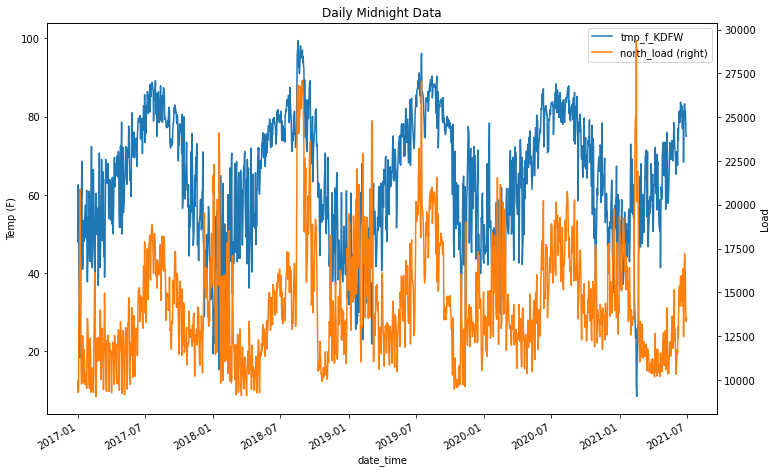

In [7]:
plt.figure(figsize=(12, 8))
ax = midnight.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)', sharex=False, title='Daily Midnight Data')
midnight.north_load.plot(secondary_y = True, legend=True, ax=ax)
ax.right_ax.set_ylabel('Load')

Text(0.5, 1.0, 'Sundays: Temp and Load at Midnight')

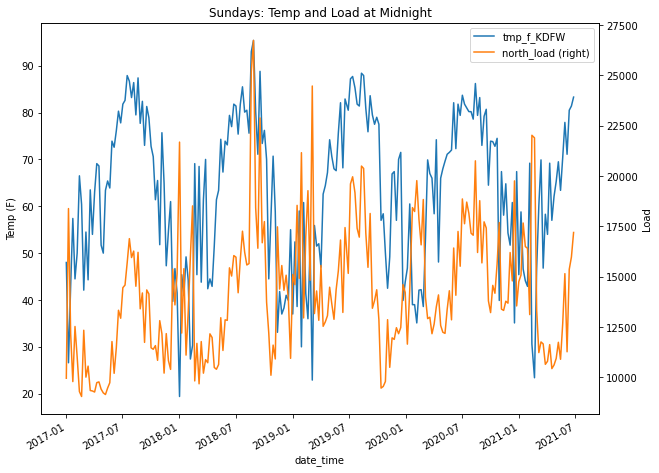

In [6]:
plt.figure(figsize=(10,8))
ax = weekly_at_midnight.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
weekly_at_midnight.north_load.plot(secondary_y = True, legend=True)
ax.right_ax.set_ylabel('Load')
plt.title('Sundays: Temp and Load at Midnight')

Text(0.5, 1.0, 'First Two Weeks Hourly')

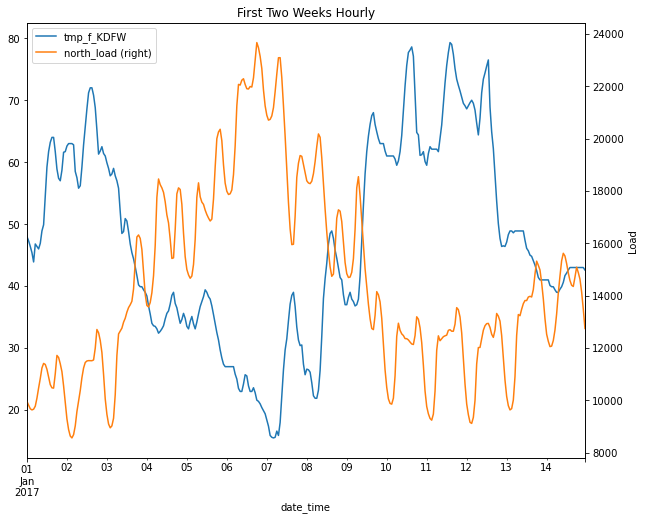

In [7]:
first_two_weeks = train_data[:336]
plt.figure(figsize = (10,8))
ax = first_two_weeks.tmp_f_KDFW.plot(legend=True)
first_two_weeks.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
plt.title('First Two Weeks Hourly')

Text(0.5, 1.0, 'First Day Hourly')

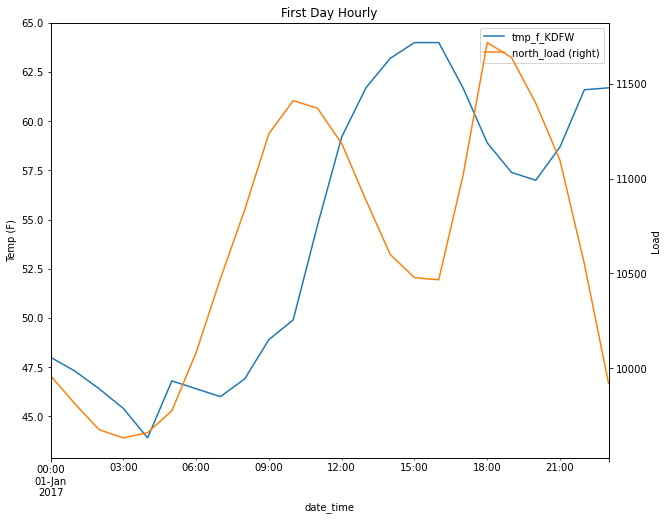

In [8]:
first_day = train_data[:24]
plt.figure(figsize=(10,8))
ax = first_day.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
first_day.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
plt.title('First Day Hourly')

Text(0.5, 1.0, 'Canonical Day (Hourly Mean Across Data)')

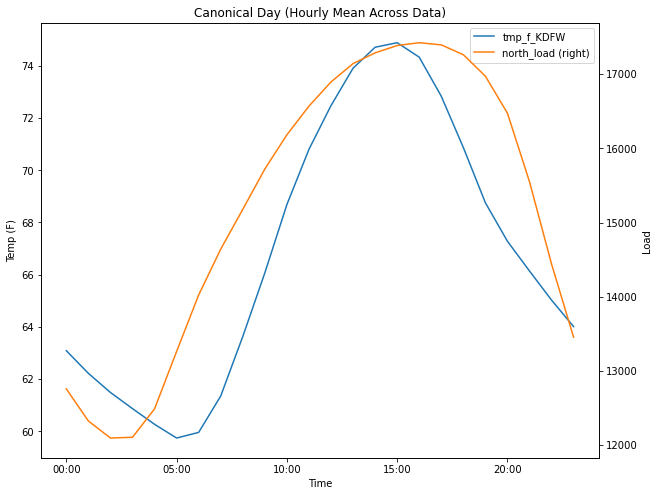

In [9]:
hourly_per_day = {}
for i in range(24):
    hourly_per_day[pd.to_datetime(train_data.index[i].hour, unit='h')] = {
            'tmp_f_KDFW': train_data[train_data.index.hour == i].tmp_f_KDFW.mean(), 
            'north_load': train_data[train_data.index.hour == i].north_load.mean()
        }

average_hourly_data = pd.DataFrame.from_dict(hourly_per_day, orient='index')
average_hourly_data.index = average_hourly_data.index.strftime('%H:%M')

plt.figure(figsize=(10,8))
ax = average_hourly_data.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
average_hourly_data.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
ax.set_xlabel('Time')
plt.title('Canonical Day (Hourly Mean Across Data)')

Text(0.5, 1.0, 'Canonical Week (Hourly Mean Across Data)')

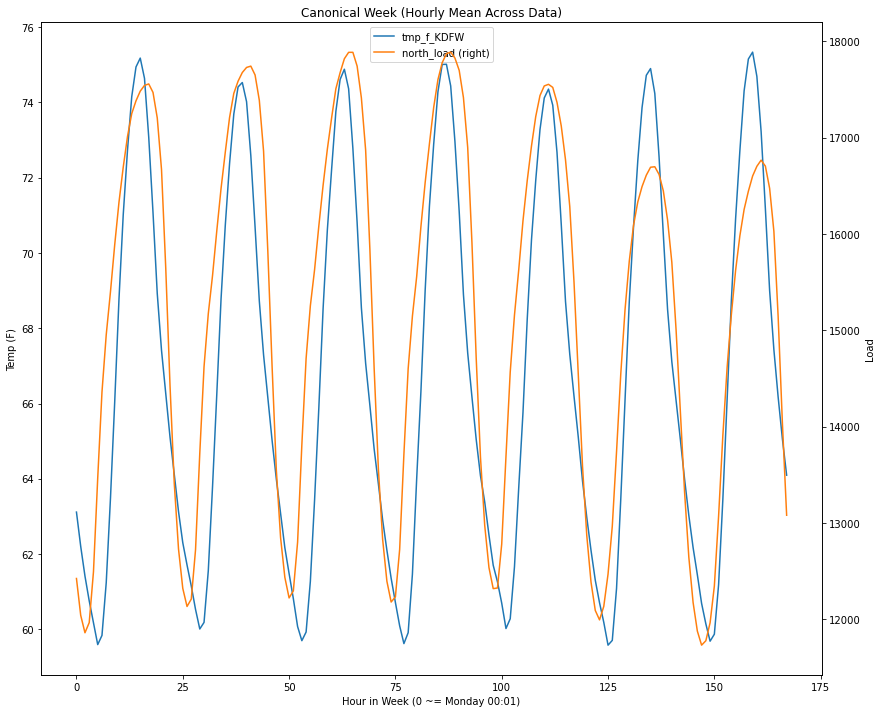

In [10]:
hourly_per_week = {}
for i in range(7):
    for j in range(24):
        hourly_per_week[i*24 + j] = {
            'tmp_f_KDFW': train_data[(train_data.index.dayofweek == i) & (train_data.index.hour == j)].tmp_f_KDFW.mean(), 
            'north_load': train_data[(train_data.index.dayofweek == i) & (train_data.index.hour == j)].north_load.mean()
        }

average_hourly_data_per_week = pd.DataFrame.from_dict(hourly_per_week, orient='index')

plt.figure(figsize=(14,12))
ax = average_hourly_data_per_week.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
average_hourly_data_per_week.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
ax.set_xlabel('Hour in Week (0 ~= Monday 00:01)')
plt.title('Canonical Week (Hourly Mean Across Data)')

#Min load is Sun->Mon night (nobody at bars)
#Peak load is Midweek evening (people scattered betwen home & work??)
#Min-peak load is Sat/Sunday evening (lower commercial load?)
#Load lags temp more on weekdays, less on Fri-Sun (more people at home --> immediate AC on?)

In [11]:
train_data.index.isocalendar().week

date_time
2017-01-01 00:00:00-06:00    52
2017-01-01 01:00:00-06:00    52
2017-01-01 02:00:00-06:00    52
2017-01-01 03:00:00-06:00    52
2017-01-01 04:00:00-06:00    52
                             ..
2021-06-30 19:00:00-06:00    26
2021-06-30 20:00:00-06:00    26
2021-06-30 21:00:00-06:00    26
2021-06-30 22:00:00-06:00    26
2021-06-30 23:00:00-06:00    26
Name: week, Length: 39119, dtype: UInt32

Text(0.5, 1.0, 'Canonical Year (Weekly Mean Across Data)')

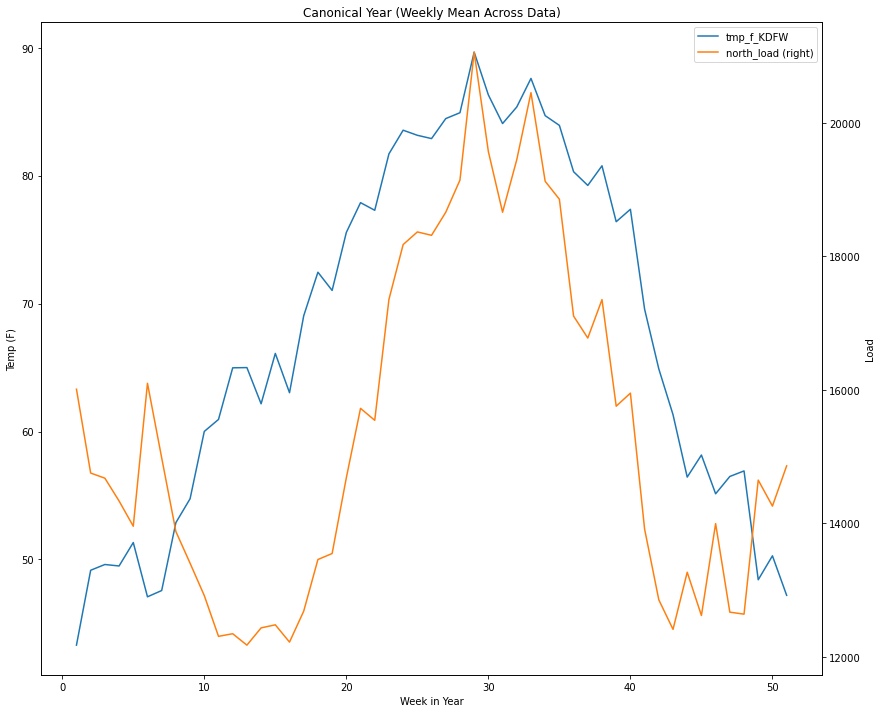

In [12]:
weekly_data = {}
for i in range(52):
    weekly_data[i] = {
        'tmp_f_KDFW': train_data[train_data.index.isocalendar().week == i].tmp_f_KDFW.mean(), 
        'north_load': train_data[train_data.index.isocalendar().week == i].north_load.mean()
    }
    
average_weekly_data = pd.DataFrame.from_dict(weekly_data, orient='index')

plt.figure(figsize=(14,12))
ax = average_weekly_data.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
average_weekly_data.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
ax.set_xlabel('Week in Year')
plt.title('Canonical Year (Weekly Mean Across Data)')

#Load highest in summer (obvious); Local peak in winter (daylight? or temp? --> looks more like temp)
    #load matches drop in temp around Dec 1 and jump around March 1
    #No obvious change with DST on (around week 10) or off (around week 45)

In [13]:
monthly_data = {}
#we have 4 years + 6 months of data
for i in range(2017, 2022):
    for j in range(1, 13):
        monthly_data[(i - 2017) * 12 + j] = {
            'tmp_f_KDFW': train_data[(train_data.index.year == i) & (train_data.index.month == j)].tmp_f_KDFW.mean(), 
            'north_load': train_data[(train_data.index.year == i) & (train_data.index.month == j)].north_load.mean()
        }

Text(0.5, 1.0, 'Averages by Month Across Data (Month 0 = Jan 2017)')

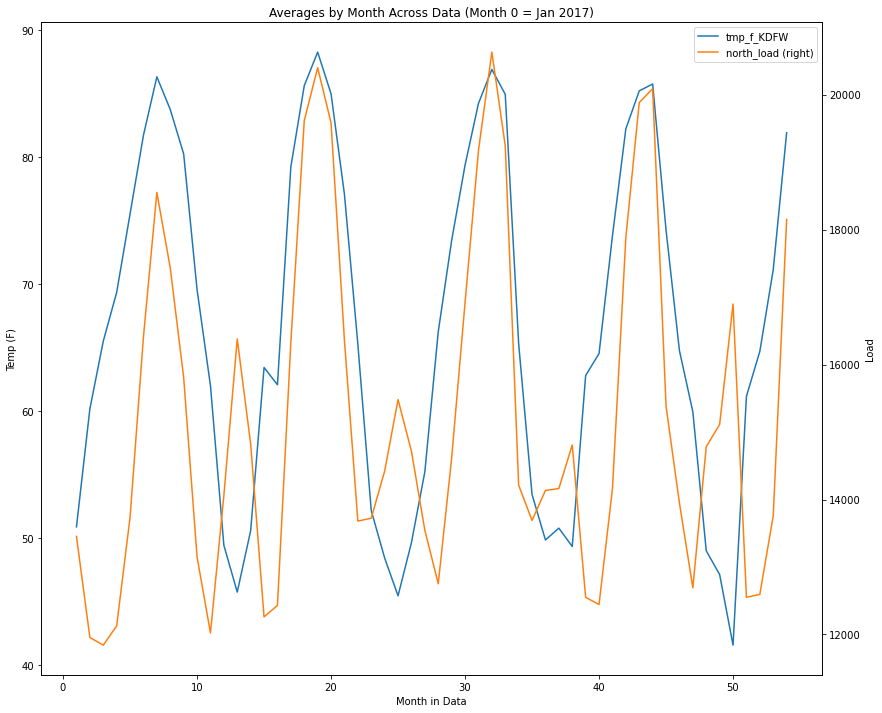

In [14]:
average_monthly_data = pd.DataFrame.from_dict(monthly_data, orient='index')

plt.figure(figsize=(14,12))
ax = average_monthly_data.tmp_f_KDFW.plot(legend=True, ylabel='Temp (F)')
average_monthly_data.north_load.plot(secondary_y=True, legend=True)
ax.right_ax.set_ylabel('Load')
ax.set_xlabel('Month in Data')
plt.title('Averages by Month Across Data (Month 0 = Jan 2017)')

Text(0.5, 1.0, 'Averages by Month Across Data (Month 0 = Jan 2017)')

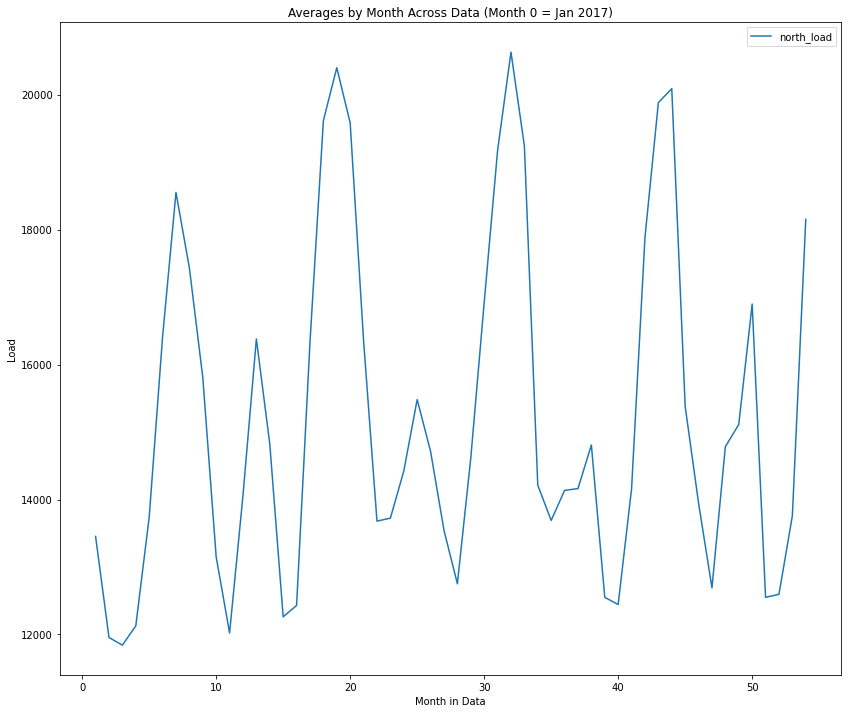

In [15]:
plt.figure(figsize=(14,12))
ax = average_monthly_data.north_load.plot(legend=True)
ax.set_ylabel('Load')
ax.set_xlabel('Month in Data')
plt.title('Averages by Month Across Data (Month 0 = Jan 2017)')

#slight upward trend???????
#Can see a drop across the board in 2020 summer --> big spike in 2021 spring (month 48 and beyond)
    #possibly due to covid vaccines? Much more of a hybrid workforce -- need to heat/cool offices AND homes

# Artifacts

## 2021 Blackout

<AxesSubplot:xlabel='date_time'>

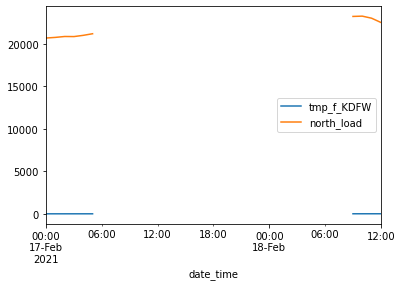

In [18]:
train_data = train_data.asfreq('H')
train_data.loc['2021-02-17 00:00:00-06:00':'2021-02-18 12:00:00-06:00'].plot()

## Hurricane Harvey

<AxesSubplot:xlabel='date_time'>

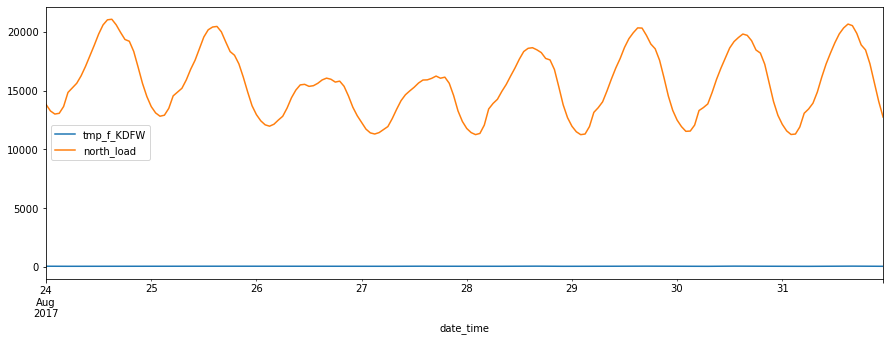

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

train_data.loc['2017-08-24 00:00:00-06:00':'2017-08-31 23:00:00-06:00'].plot(ax=ax)

<AxesSubplot:xlabel='date_time'>

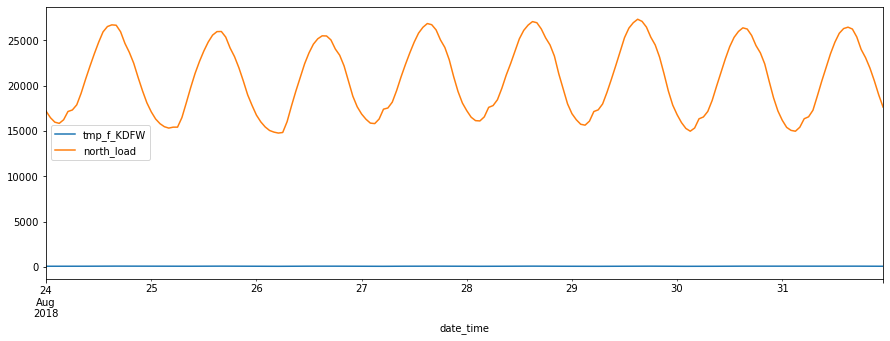

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
train_data.loc['2018-08-24 00:00:00-06:00':'2018-08-31 23:00:00-06:00'].plot(ax=ax)

## COVID

In [29]:
average_monthly_data['6_SMA'] = average_monthly_data['north_load'].rolling(window = 6, min_periods = 1).mean()

Text(0.5, 1.0, 'Averages by Month Across Data (Month 0 = Jan 2017)')

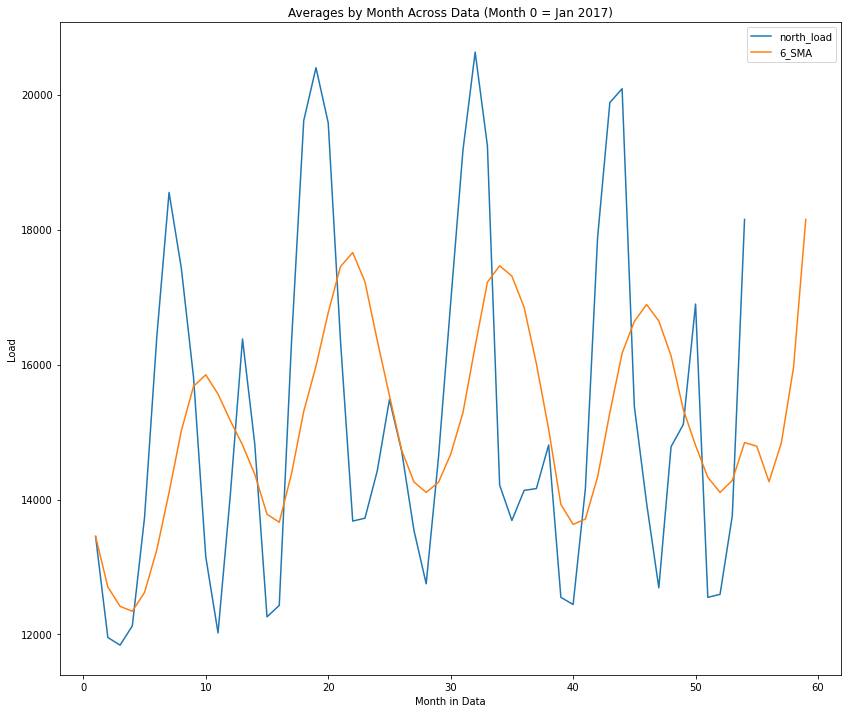

In [30]:
plt.figure(figsize=(14,12))
ax = average_monthly_data.north_load.plot(legend=True)
average_monthly_data['6_SMA'].plot(legend=True)
ax.set_ylabel('Load')
ax.set_xlabel('Month in Data')
plt.title('Averages by Month Across Data (Month 0 = Jan 2017)')
